In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

### State errors dataset  of the simulation
The detectionInfo.csv is a file that contains the dataset of the errors of three simulation tests of the autonomous landing  process of a drone on a landing platform. Each test was made using one of the detectors and a kalman filter used to estimate the position of the platform even when the detector did not have notion of the platform's position. 

This dataset contains only the errors of the detection (result of the detectors orb, sift or surf) and the errors of the Kalman filter with respect to the real position of the landing platform.

In [4]:
file = "./data/detectionInfo.csv"
data = pd.read_csv(file)

Get the size of the dataset and prints the column names, each column must correspond to one of the three detectors used in the simulation tests (orb, sift and surf). There must be 14 columns for each detector, 7 for the detection erros and 7 for the kalman filter errors, both errors were obtained by comparing the result of the detector or the kalman filter with the real position of the landing platform on the image. The errors for both detection and kalman filter (for each detector) are:
 * Left height
 * Right height
 * Top width
 * Bottom width
 * Angle
 * Center x
 * Center y

Height and width are measured twice as they are obtained by obtaining the location of the points of each vertex of the platform in the image, and the detections or estimates do not always result in a square, but in a quadrilateral.

In [5]:
print("Data size:", data.shape)
print("Data Columns:", data.columns)

Data size: (198, 42)
Data Columns: Index(['ORB_detection_left_height', 'ORB_kalman_left_height',
       'ORB_detection_right_height', 'ORB_kalman_right_height',
       'ORB_detection_top_width', 'ORB_kalman_top_width',
       'ORB_detection_bottom_width', 'ORB_kalman_bottom_width',
       'ORB_detection_angle', 'ORB_kalman_angle', 'ORB_detection_center_x',
       'ORB_kalman_center_x', 'ORB_detection_center_y', 'ORB_kalman_center_y',
       'SIFT_detection_left_height', 'SIFT_kalman_left_height',
       'SIFT_detection_right_height', 'SIFT_kalman_right_height',
       'SIFT_detection_top_width', 'SIFT_kalman_top_width',
       'SIFT_detection_bottom_width', 'SIFT_kalman_bottom_width',
       'SIFT_detection_angle', 'SIFT_kalman_angle', 'SIFT_detection_center_x',
       'SIFT_kalman_center_x', 'SIFT_detection_center_y',
       'SIFT_kalman_center_y', 'SURF_detection_left_height',
       'SURF_kalman_left_height', 'SURF_detection_right_height',
       'SURF_kalman_right_height', 'SURF_de

Check if each detector has 14 columns corresponding to the detection errors (7 columns) and the kalman filter errors (7 columns) respect to the real position of the platform in the images.

In [6]:
orb, sift, surf = 0, 0, 0

for column in data.columns:
    if "ORB" in column:
        orb += 1
    elif "SIFT" in column:
        sift += 1
    elif "SURF" in column:
        surf += 1

print("Orb: {}, Sift: {}, Surf: {}".format(orb, sift, surf))

Orb: 14, Sift: 14, Surf: 14


In [7]:
data

,ORB_detection_left_height,ORB_kalman_left_height,ORB_detection_right_height,ORB_kalman_right_height,ORB_detection_top_width,ORB_kalman_top_width,ORB_detection_bottom_width,ORB_kalman_bottom_width,ORB_detection_angle,ORB_kalman_angle,ORB_detection_center_x,ORB_kalman_center_x,ORB_detection_center_y,ORB_kalman_center_y,SIFT_detection_left_height,SIFT_kalman_left_height,SIFT_detection_right_height,SIFT_kalman_right_height,SIFT_detection_top_width,SIFT_kalman_top_width,SIFT_detection_bottom_width,SIFT_kalman_bottom_width,SIFT_detection_angle,SIFT_kalman_angle,SIFT_detection_center_x,SIFT_kalman_center_x,SIFT_detection_center_y,SIFT_kalman_center_y,SURF_detection_left_height,SURF_kalman_left_height,SURF_detection_right_height,SURF_kalman_right_height,SURF_detection_top_width,SURF_kalman_top_width,SURF_detection_bottom_width,SURF_kalman_bottom_width,SURF_detection_angle,SURF_kalman_angle,SURF_detection_center_x,SURF_kalman_center_x,SURF_detection_center_y,SURF_kalman_center_y
0,88.5319,15.4744,89.5420,14.4643,88.5140,15.3069,88.8118,15.0091,2.4587,11.5925,311.8850,1.6721,244.1950,0.5372,1.9680,2.5591,1.4714,5.3140,0.4206,2.4529,2.2771,4.7591,0.2506,1.6053,24.3975,24.5733,29.9102,34.3681,108.0345,108.0345,43.5302,43.5302,43.7200,43.7200,56.5072,56.5072,179.0874,179.0874,343.9625,343.9625,242.4300,242.4300
1,10.0180,10.7784,11.7335,19.0229,10.4904,8.3775,2.6372,8.9242,3.2550,10.2840,0.7690,0.7396,2.3542,2.3713,4.7511,4.7464,6.7576,4.2419,2.8774,3.3221,2.7782,2.5606,0.6978,3.0297,1.9004,14.4452,0.5053,21.9919,44.6942,44.6942,43.4693,43.4693,44.2441,44.2441,43.5946,43.5946,3.7747,3.7747,302.6025,302.6025,223.2375,223.2375
2,90.9856,8.5396,92.0653,7.4599,92.4175,6.1427,92.4449,6.1153,1.7853,4.4498,309.7500,1.4408,242.9700,1.1936,0.2527,4.5300,1.4680,3.8120,2.3681,3.7567,0.3610,2.2051,0.3476,1.8077,0.8398,1.0072,1.2366,0.4958,42.8192,42.8192,43.3431,43.3431,43.2760,43.2760,43.3530,43.3530,7.6217,7.6217,331.2325,331.2325,255.3275,255.3275
3,93.3270,3.9292,93.8100,3.4462,93.3225,2.3811,95.1117,0.5920,1.2230,3.1798,309.0900,0.9534,242.5450,0.1295,55.9386,6.1713,56.4603,5.6497,56.4546,2.0215,57.1739,1.3022,1.2628,0.5536,318.1975,0.1008,252.8100,0.4479,42.3486,42.3486,39.9326,39.9326,43.7157,43.7157,42.9613,42.9613,7.4360,7.4360,334.8275,334.8275,250.7750,250.7750
4,11.9053,3.3291,0.5600,3.3399,10.5478,1.3839,8.6227,0.3739,2.3792,3.5700,0.0095,0.5322,0.3398,0.2040,11.8562,6.5038,0.1490,6.1506,3.9812,2.7734,10.0771,2.4211,8.0872,0.0576,0.3223,0.8852,0.2250,0.2337,43.3647,43.3647,41.7731,41.7731,43.0441,43.0441,42.7090,42.7090,4.0952,4.0952,311.6825,311.6825,242.4750,242.4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3696,12.8272,15.4304,12.3404,4.2162,6.2575,10.5392,5.2368,0.2835,0.9858,4.6928,5.0153,1.0480,1.0820,391.3493,77.2034,397.1066,71.4461,392.7489,77.5343,392.9486,77.3345,2.3073,5.9153,327.1875,7.1685,249.1700,5.6078
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0328,15.0818,19.1032,13.6482,9.2100,8.0391,7.4058,6.5928,0.9123,1.0831,4.8827,5.0314,0.5599,0.7386,391.3940,67.9984,398.5801,60.8122,395.6282,67.2341,395.8764,66.9858,2.4989,1.9036,326.4700,1.3886,248.0925,4.1838
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1304,15.0528,12.3501,14.0311,7.8939,7.4350,9.9767,8.9550,1.4409,0.0776,0.7417,3.8964,0.6177,0.0130,404.4395,44.1105,402.8542,45.6958,401.4148,48.3350,405.6947,44.0549,1.4209,1.5767,321.7950,5.8126,245.9350,5.9045
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6507,13.9283,1.9733,14.9083,9.7634,10.0487,4.5451,10.0457,1.0855,1.6057,1.7798,2.4364,2.3970,1.9570,408.8141,37.5390,410.1325,36.2206,410.0137,38.9384,412.9102,36.0419,1.5960,1.5237,320.7150,6.8274,245.2175,7.9582


### State errors dataframe
Create a new dataframe with six state errors:
 * Height
 * Width
 * Angle
 * Centroid's x coordinate 
 * Centroid's y coordinate

The height is obtained by calculating the mean of the measured left and right heights, the width is obtained by calculating the mean of the measured top and bottom widths.
This dataframe contains the three detectors used (orb, sift and surf) and for each detector the state errors mentioned above for both detection and the Kalman filter. There must be 12 columns per detector of which 6 are for the state errors of the detection and 6 are for the state errors of the kalman filter, in total the dataframe contains 30 columns.

In [8]:
error_states_df = pd.DataFrame()

error_states_df['ORB_detection_height'] = data[['ORB_detection_left_height', 'ORB_detection_right_height']].mean(axis=1)
error_states_df['ORB_detection_width'] = data[['ORB_detection_top_width', 'ORB_detection_bottom_width']].mean(axis=1)
error_states_df['ORB_detection_angle'] = data['ORB_detection_angle']
error_states_df['ORB_detection_center_x'] = data['ORB_detection_center_x']
error_states_df['ORB_detection_center_y'] = data['ORB_detection_center_y']

error_states_df['ORB_kalman_height'] = data[['ORB_kalman_left_height', 'ORB_kalman_right_height']].mean(axis=1)
error_states_df['ORB_kalman_width'] = data[['ORB_kalman_top_width', 'ORB_kalman_bottom_width']].mean(axis=1)
error_states_df['ORB_kalman_angle'] = data['ORB_kalman_angle']
error_states_df['ORB_kalman_center_x'] = data['ORB_kalman_center_x']
error_states_df['ORB_kalman_center_y'] = data['ORB_kalman_center_y']

error_states_df['SIFT_detection_height'] = data[['SIFT_detection_left_height', 'SIFT_detection_right_height']].mean(axis=1)
error_states_df['SIFT_detection_width'] = data[['SIFT_detection_top_width', 'SIFT_detection_bottom_width']].mean(axis=1)
error_states_df['SIFT_detection_angle'] = data['SIFT_detection_angle']
error_states_df['SIFT_detection_center_x'] = data['SIFT_detection_center_x']
error_states_df['SIFT_detection_center_y'] = data['SIFT_detection_center_y']

error_states_df['SIFT_kalman_height'] = data[['SIFT_kalman_left_height', 'SIFT_kalman_right_height']].mean(axis=1)
error_states_df['SIFT_kalman_width'] = data[['SIFT_kalman_top_width', 'SIFT_kalman_bottom_width']].mean(axis=1)
error_states_df['SIFT_kalman_angle'] = data['SIFT_kalman_angle']
error_states_df['SIFT_kalman_center_x'] = data['SIFT_kalman_center_x']
error_states_df['SIFT_kalman_center_y'] = data['SIFT_kalman_center_y']

error_states_df['SURF_detection_height'] = data[['SURF_detection_left_height', 'SURF_detection_right_height']].mean(axis=1)
error_states_df['SURF_detection_width'] = data[['SURF_detection_top_width', 'SURF_detection_bottom_width']].mean(axis=1)
error_states_df['SURF_detection_angle'] = data['SURF_detection_angle']
error_states_df['SURF_detection_center_x'] = data['SURF_detection_center_x']
error_states_df['SURF_detection_center_y'] = data['SURF_detection_center_y']

error_states_df['SURF_kalman_height'] = data[['SURF_kalman_left_height', 'SURF_kalman_right_height']].mean(axis=1)
error_states_df['SURF_kalman_width'] = data[['SURF_kalman_top_width', 'SURF_kalman_bottom_width']].mean(axis=1)
error_states_df['SURF_kalman_angle'] = data['SURF_kalman_angle']
error_states_df['SURF_kalman_center_x'] = data['SURF_kalman_center_x']
error_states_df['SURF_kalman_center_y'] = data['SURF_kalman_center_y']

error_states_df

,ORB_detection_height,ORB_detection_width,ORB_detection_angle,ORB_detection_center_x,ORB_detection_center_y,ORB_kalman_height,ORB_kalman_width,ORB_kalman_angle,ORB_kalman_center_x,ORB_kalman_center_y,SIFT_detection_height,SIFT_detection_width,SIFT_detection_angle,SIFT_detection_center_x,SIFT_detection_center_y,SIFT_kalman_height,SIFT_kalman_width,SIFT_kalman_angle,SIFT_kalman_center_x,SIFT_kalman_center_y,SURF_detection_height,SURF_detection_width,SURF_detection_angle,SURF_detection_center_x,SURF_detection_center_y,SURF_kalman_height,SURF_kalman_width,SURF_kalman_angle,SURF_kalman_center_x,SURF_kalman_center_y
0,89.03695,88.66290,2.4587,311.8850,244.1950,14.96935,15.15800,11.5925,1.6721,0.5372,1.71970,1.34885,0.2506,24.3975,29.9102,3.93655,3.60600,1.6053,24.5733,34.3681,75.78235,50.11360,179.0874,343.9625,242.4300,75.78235,50.11360,179.0874,343.9625,242.4300
1,10.87575,6.56380,3.2550,0.7690,2.3542,14.90065,8.65085,10.2840,0.7396,2.3713,5.75435,2.82780,0.6978,1.9004,0.5053,4.49415,2.94135,3.0297,14.4452,21.9919,44.08175,43.91935,3.7747,302.6025,223.2375,44.08175,43.91935,3.7747,302.6025,223.2375
2,91.52545,92.43120,1.7853,309.7500,242.9700,7.99975,6.12900,4.4498,1.4408,1.1936,0.86035,1.36455,0.3476,0.8398,1.2366,4.17100,2.98090,1.8077,1.0072,0.4958,43.08115,43.31450,7.6217,331.2325,255.3275,43.08115,43.31450,7.6217,331.2325,255.3275
3,93.56850,94.21710,1.2230,309.0900,242.5450,3.68770,1.48655,3.1798,0.9534,0.1295,56.19945,56.81425,1.2628,318.1975,252.8100,5.91050,1.66185,0.5536,0.1008,0.4479,41.14060,43.33850,7.4360,334.8275,250.7750,41.14060,43.33850,7.4360,334.8275,250.7750
4,6.23265,9.58525,2.3792,0.0095,0.3398,3.33450,0.87890,3.5700,0.5322,0.2040,6.00260,7.02915,8.0872,0.3223,0.2250,6.32720,2.59725,0.0576,0.8852,0.2337,42.56890,42.87655,4.0952,311.6825,242.4750,42.56890,42.87655,4.0952,311.6825,242.4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.40000,7.37770,0.2835,4.6928,1.0480,12.58380,5.74715,0.9858,5.0153,1.0820,394.22795,392.84875,2.3073,327.1875,249.1700,74.32475,77.43440,5.9153,7.1685,5.6078
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56800,8.30790,0.9123,4.8827,0.5599,14.36500,7.31595,1.0831,5.0314,0.7386,394.98705,395.75230,2.4989,326.4700,248.0925,64.40530,67.10995,1.9036,1.3886,4.1838
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.24025,8.93530,1.4409,0.7417,0.6177,14.54195,8.19500,0.0776,3.8964,0.0130,403.64685,403.55475,1.4209,321.7950,245.9350,44.90315,46.19495,1.5767,5.8126,5.9045
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.31200,7.15425,1.0855,1.7798,2.3970,14.41830,10.04720,1.6057,2.4364,1.9570,409.47330,411.46195,1.5960,320.7150,245.2175,36.87980,37.49015,1.5237,6.8274,7.9582


In [9]:
error_states_df.mean()

ORB_detection_height        57.957140
ORB_detection_width         58.163909
ORB_detection_angle          4.366290
ORB_detection_center_x      55.586690
ORB_detection_center_y      41.991111
ORB_kalman_height           14.045286
ORB_kalman_width            13.497709
ORB_kalman_angle             3.135117
ORB_kalman_center_x          2.152961
ORB_kalman_center_y          1.773525
SIFT_detection_height       18.082913
SIFT_detection_width        15.982274
SIFT_detection_angle         1.816012
SIFT_detection_center_x     41.931214
SIFT_detection_center_y     30.161084
SIFT_kalman_height           9.367480
SIFT_kalman_width            7.002670
SIFT_kalman_angle            1.319266
SIFT_kalman_center_x         2.749651
SIFT_kalman_center_y         1.120145
SURF_detection_height       68.244603
SURF_detection_width        67.528705
SURF_detection_angle         5.547140
SURF_detection_center_x    176.257607
SURF_detection_center_y    131.968774
SURF_kalman_height          15.685468
SURF_kalman_

In [10]:
error_states_df.std()

ORB_detection_height       110.243219
ORB_detection_width        111.736483
ORB_detection_angle          7.623822
ORB_detection_center_x     117.258643
ORB_detection_center_y      88.392855
ORB_kalman_height           10.101361
ORB_kalman_width            19.055567
ORB_kalman_angle             6.610005
ORB_kalman_center_x          7.662691
ORB_kalman_center_y          5.421674
SIFT_detection_height       20.433395
SIFT_detection_width        22.403285
SIFT_detection_angle         2.691550
SIFT_detection_center_x    105.117688
SIFT_detection_center_y     78.546978
SIFT_kalman_height           6.202928
SIFT_kalman_width            9.711649
SIFT_kalman_angle            2.023828
SIFT_kalman_center_x         4.714584
SIFT_kalman_center_y         2.913609
SURF_detection_height       86.822571
SURF_detection_width        88.169718
SURF_detection_angle        20.778802
SURF_detection_center_x    167.008442
SURF_detection_center_y    125.222746
SURF_kalman_height          17.522682
SURF_kalman_

## Testing some graphs

In [11]:
x_data = ["ORB", "SIFT", "SURF"]

[Text(0, 0, 'ORB'), Text(0, 0, 'SIFT'), Text(0, 0, 'SURF')]

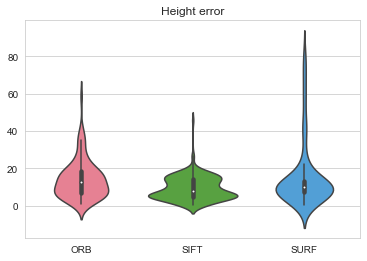

In [12]:
height = sns.violinplot(data=error_states_df[['ORB_kalman_height',
                                     'SIFT_kalman_height',
                                     'SURF_kalman_height',
                                    ]],
                        palette="husl")
height.set_title('Height error')
height.set_xticklabels(['ORB','SIFT','SURF'])

[Text(0, 0, 'ORB'), Text(0, 0, 'SIFT'), Text(0, 0, 'SURF')]

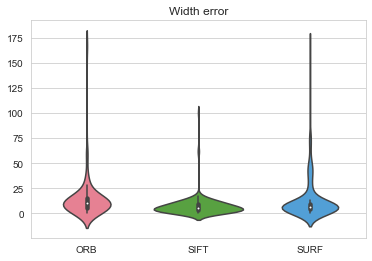

In [13]:
width = sns.violinplot(data=error_states_df[['ORB_kalman_width',
                                     'SIFT_kalman_width',
                                     'SURF_kalman_width',
                                    ]],
                       palette="husl")
width.set_title('Width error')
width.set_xticklabels(['ORB','SIFT','SURF'])

[Text(0, 0, 'ORB'), Text(0, 0, 'SIFT'), Text(0, 0, 'SURF')]

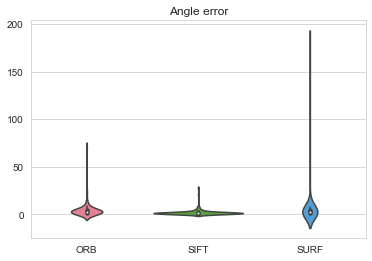

In [14]:
angle = sns.violinplot(data=error_states_df[['ORB_detection_angle',
                                     'SIFT_detection_angle',
                                     'SURF_detection_angle',
                                    ]],
                       palette="husl")
angle.set_title('Angle error')
angle.set_xticklabels(['ORB','SIFT','SURF'])

[Text(0, 0, 'x ORB'),
 Text(0, 0, 'x SIFT'),
 Text(0, 0, 'x SURF'),
 Text(0, 0, 'y ORB'),
 Text(0, 0, 'y SIFT'),
 Text(0, 0, 'y SURF')]

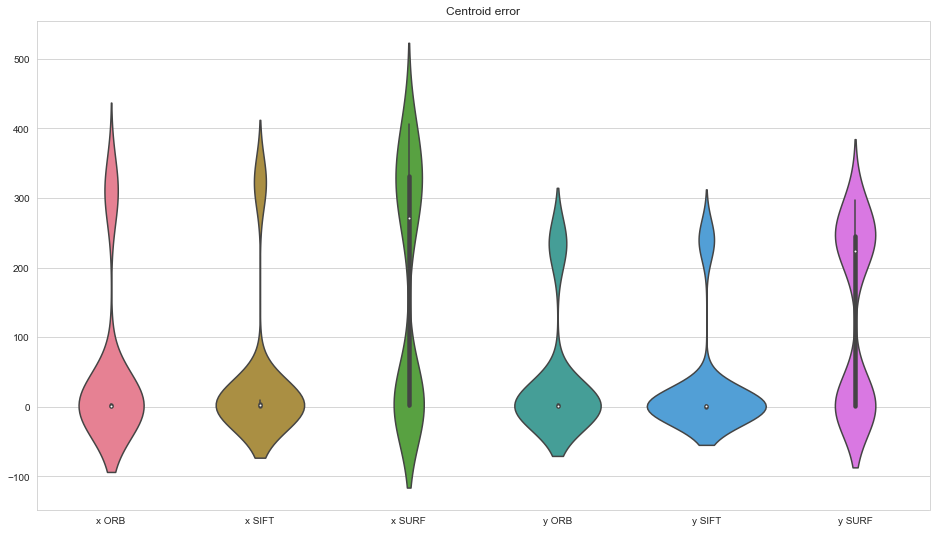

In [15]:
plt.figure(figsize=(16, 9))

centroid = sns.violinplot(data=error_states_df[['ORB_detection_center_x',
                                     'SIFT_detection_center_x',
                                     'SURF_detection_center_x',
                                     'ORB_detection_center_y',
                                     'SIFT_detection_center_y',
                                     'SURF_detection_center_y',
                                    ]],
                       palette="husl")
centroid.set_title('Centroid error')
centroid.set_xticklabels(['x ORB','x SIFT','x SURF', 'y ORB','y SIFT','y SURF'])

### Which detector is better?
Taking into account the results obtained in the violin charts for each of the errors, it was decided that the SIFT detector has a better performance. For each error the SIFT detector has a median closer to zero and that the standard deviation is the smaller compared to the other two detectors.

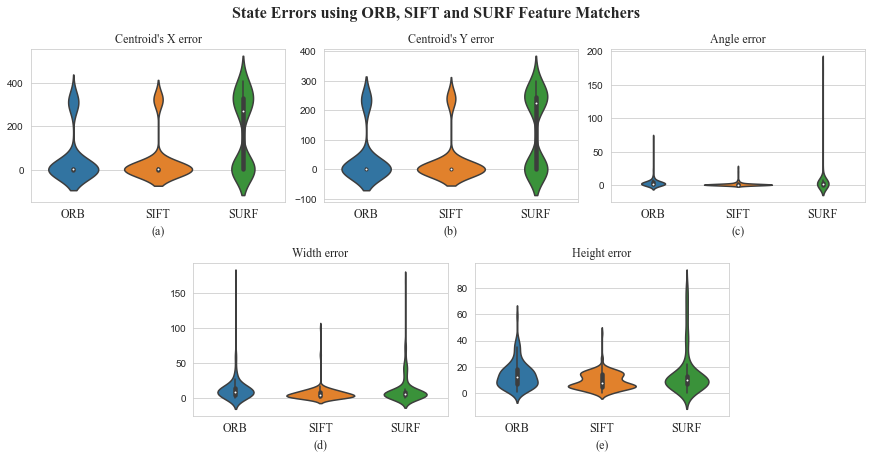

In [50]:
timesfont = {'fontname':'Times New Roman'}

sns.set_style('whitegrid')

fig = plt.figure(constrained_layout=True, figsize=(12,6.25))

gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 1:3])
ax5 = fig.add_subplot(gs[1, 3:5])

centroid_x = sns.violinplot(data=error_states_df[['ORB_detection_center_x',
                                                'SIFT_detection_center_x',
                                                'SURF_detection_center_x',]],
                            ax=ax1)
centroid_y = sns.violinplot(data=error_states_df[['ORB_detection_center_y',
                                                'SIFT_detection_center_y',
                                                'SURF_detection_center_y',]],
                            ax=ax2)
angle = sns.violinplot(data=error_states_df[['ORB_detection_angle',
                                             'SIFT_detection_angle',
                                             'SURF_detection_angle',]],
                       ax=ax3)
width = sns.violinplot(data=error_states_df[['ORB_kalman_width',
                                             'SIFT_kalman_width',
                                             'SURF_kalman_width',]],
                       ax=ax4)
height = sns.violinplot(data=error_states_df[['ORB_kalman_height',
                                             'SIFT_kalman_height',
                                             'SURF_kalman_height',]],
                        ax=ax5)

centroid_x.set_title("Centroid's X error", fontsize=12, **timesfont)
centroid_y.set_title("Centroid's Y error", fontsize=12, **timesfont)
angle.set_title("Angle error", fontsize=12, **timesfont)
width.set_title("Width error", fontsize=12, **timesfont)
height.set_title("Height error", fontsize=12, **timesfont)

centroid_x.set_xticklabels(['ORB','SIFT','SURF'], fontsize=12, **timesfont)
centroid_y.set_xticklabels(['ORB','SIFT','SURF'], fontsize=12, **timesfont)
angle.set_xticklabels(['ORB','SIFT','SURF'], fontsize=12, **timesfont)
width.set_xticklabels(['ORB','SIFT','SURF'], fontsize=12, **timesfont)
height.set_xticklabels(['ORB','SIFT','SURF'], fontsize=12, **timesfont)

centroid_x.set_xlabel("(a)", fontsize=12, **timesfont)
centroid_y.set_xlabel("(b)", fontsize=12, **timesfont)
angle.set_xlabel("(c)", fontsize=12, **timesfont)
width.set_xlabel("(d)", fontsize=12, **timesfont)
height.set_xlabel("(e)", fontsize=12, **timesfont)

fig.suptitle('State Errors using ORB, SIFT and SURF Feature Matchers', fontsize=16, fontweight='bold', **timesfont)

plt.show()